<h3> LAB 8 - DFT</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [2]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

1) Considere a sequência teórica: x[n]=1, para n=0,1,2,3, e x[n]=0, para todos os outros valores de n (-infinito a +infinito).

In [3]:
def seq_teorica(n):
    y = np.zeros(len(n))
    for i in range (len(n)):
        if (n[i] >= 0 and n[i] < 4):
            y[i] = 1
    return y

2) Calcule a transformada de fourier da sequencia x[n], n=0 a 199, obtendo 200 valores de frequencia entre 0 e 2pi.

In [4]:
n = np.linspace(0,199,200)
x = seq_teorica(n)
X_ft_200pts = np.fft.fft(x)
w_200pts = np.linspace(0,199,200)*2*np.pi/200;

3) Calcule a DFT desta sequencia, para n=0 a 3.

In [5]:
X_dft_4pts = np.fft.fft(x,4)
w_4pts = np.linspace(0,3,4)*2*np.pi/4

4) Calcule a DFT desta sequencia, para n=0 a 7.

In [6]:
X_dft_8pts = np.fft.fft(x,8)
w_8pts = np.linspace(0,7,8)*2*np.pi/8

5) Calcule a DFT desta sequencia, para n=0 a 15.

In [7]:
X_dft_16pts = np.fft.fft(x,16)
w_16pts = np.linspace(0,15,16)*2*np.pi/16

6) Plote no mesmo eixo (abscissa de zero a 2pi), todas as 4 transformadas. usando os seguintes simbolos: 2) linha continua, 3) 'o', 4) '+', 5) 'x' .

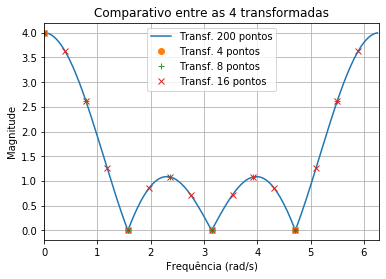

In [8]:
plt.grid(True)
plt.plot(w_200pts,abs(X_ft_200pts))
plt.plot(w_4pts,abs(X_dft_4pts),'o')
plt.plot(w_8pts,abs(X_dft_8pts),'+')
plt.plot(w_16pts,abs(X_dft_16pts),'x')
plt.legend(['Transf. 200 pontos', 'Transf. 4 pontos', 
            'Transf. 8 pontos', 'Transf. 16 pontos'])
plt.title("Comparativo entre as 4 transformadas")
plt.ylabel ('Magnitude')
plt.xlabel ('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()

7) Comente o resultado.

Conforme esperado, os pontos calculados nas 4 transformadas representam o mesmo comportamento, se sobrepondo no intervalo observado. </br>
A principal diferença entre elas é o quão discreta é a curva resultante, que possui a mesma quantidade de pontos que a sequência que a originou. 

8) Gere um vetor x, uma senoide de 32 pontos, com 2 ciclos completos: x=sin((0:31)/32*2*2*pi).

In [9]:
x=np.sin((np.linspace(0,31,32))/32*2*2*np.pi)
X_ft = np.fft.fft(x)
w = np.linspace(0,31,32)*2*np.pi/32

9) Gere vetor x2 acrescentando zeros ao final do vetor x de forma a duplicar seu tamanho.

In [16]:
x2 = np.concatenate((x, np.zeros(32)), axis=None) 
w_2 = np.linspace(0,63,64)*2*np.pi/64
X_ft2 = np.fft.fft(x2)    

10) Gere um vetor x3 com 64

In [23]:
x3=np.sin((np.linspace(0,63,64))/32*2*2*np.pi)
X_ft3 = np.fft.fft(x3)
w_3 = np.linspace(0,63,64)*2*np.pi/64

11) Plote no mesmo eixo o valor absoluto das DFTs X, X2 e X3 e comente o resultado.

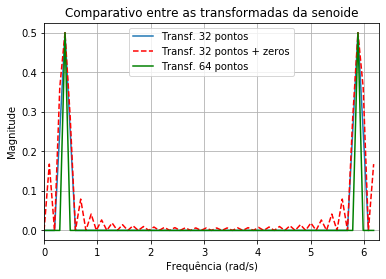

In [25]:
plt.grid(True)
plt.plot(w,abs(X_ft)/32)
plt.plot(w_2,abs(X_ft2)/32,'r--')
plt.plot(w_3,abs(X_ft3)/64,'g')
plt.legend(['Transf. 32 pontos', 'Transf. 32 pontos + zeros', 
            'Transf. 64 pontos'])
plt.title("Comparativo entre as transformadas da senoide")
plt.ylabel ('Magnitude')
plt.xlabel ('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()

Observa-se que as transformadas de 32 pontos e a de 32 pontos com 32 zeros concatenados são bem similares na frequência fundamental, porém a segunda apresenta lóbulos adicionais. 

Assim, a transformada de x indica um sinal impulso e a de x2 se assemelha ao módulo de um sinc. Isto pode ser compreendido como resultado da adição de uma janela retangular de zeros no sinal de x2, que reduziu o intervalo entre as frequências pela metade. Como a informação (sinal) permanece o mesmo, a DFT de x2 simplesmente apresenta uma amostragem mais densa que a DFT de x. Na frequência, isto resulta na convolução da transformada do sinal senoidal (dois impulsos) com um sinc.

A transformada de x3 melhor se aproxima da transformada de Fourier de um seno no contínuo quando comparada a transformada de x. Isto porque é mais próxima de um impulso, tendo maior magnitude máxima e ocupa uma faixa menor do eixo horizontal.